In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keşif

Soruları çözmeye başlamadan önce datasetin ne içerdiğini anlamak için küçük çaplı bir keşif yaptım.

In [2]:
data = pd.read_csv("data.csv")

In [3]:
#ilk 5 kolonu yazdırır.
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#kolonların isimlerini gösterir
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#veri seti hakkında genel bilgiler verir.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## ---------------------------------------------------------------------------------------------------------------------------------

Kolonlar hiç NaN değeri içermiyor. Sadece son kolon("Unnamed: 32") NaN verilerden oluşuyor. Çalışılması gereken kolonlar belirtildiği için silinmesine gerek yok ama yine de sildim.

In [6]:
#NaN değerlerin kolonlardaki toplamını verir
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Adı belirtilen kolonu siler.
data = data.drop("Unnamed: 32", axis=1)

In [8]:
#Kolon kaldırıldı.
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

Burada describe() metoduyla bütün kolonların değerlerini görüyoruz. İkinci soruda istenen kolonlarla ilgili işlem yapılacaktır.

In [9]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1. Soru

In [10]:
from IPython.display import Image
Image(url= "images/measurements1.png", width=600, height=600)
#görsel kaynağı: https://medium.com/@rndayala/data-levels-of-measurement-4af33d9ab51a

Levels of measurements yani ölçüm düzeyleri 2'ye ayrılmakla birlikte 4 tanedir.

- Öncelikle kategorik ve numerik olarak 2'ye ayrılır. Bunu yapmak değişken türlerini kategorize etmemizi basitleştirmek, doğru istatistiksel testi seçmek adına bize yardımcı olur
- Kategorik veriler nominal ve ordinal olarak, numerik veriler ise interval ve ratio olarak kendi içlerinde 2'ye ayrılır.
- Nominal veriler, basitçe "etiketler" olarak adlandırılabilir(isim, cinsiyet vs.). Fakat bu verilerle büyükten küçüğe sıralama gibi işlemlede bulunamayız.
- Ordinal veriler, kategoriler haline getirilmiş verileri sıralama işlemi yapar. Kategorik halde bulunması ordinal verileri numerik verilerden ayırır.
- Interval veriler, sürekli verilerdir. Matematiksel anlamda söylenecek olursa, interval veriler aralarındaki fark anlamlıdır. Yani aşağıdaki örnekte göründüğü gibi bir kişinin doğduğu yıllar arasındaki fark onların yaşlarını verecektir. Ama kategorik verilere bakıldığında bir kişinin cinsiyeti ve mutluluk oranının arasında bir fark ya yoktur ya da anlamlı değildir. 
- Ratio veriler, interval verilerle aynı özellikleri taşır. 
- Interval ve ratio verileri birbirinden ayıran kavram mutlak sıfır noktasıdır(absolute/true zero). Ratio'da veriler bir başlangıç ve bitiş noktasına sahip olabilecekken, interval verilerde bu yoktur.

In [11]:
#nominal değerler
Column1 = ["Erkek","Kadın","Kadın","Erkek"]
#Ordinal değerler
Column2 = ["Mutsuz", "Çok Mutsuz","Mutlu","Çok Mutlu"]
#Interval değerler
Column3 = ["18-04-2004","03-10-1996","15-09-1983","29-12-2016"]
#Ratio değerler
Column4 = ["17","25","82","5"]

#Kodun daha iyi okunabilmesi adına değerleri veri setine tek tek yazmayıp zip komutuyla birleştirdim.
combined_list = list(zip(Column1,Column2,Column3,Column4))  

In [27]:
#Zip komutuyla içinde 4 tuple olacak şekilde bir liste elde ettik.
combined_list

[('Erkek', 'Mutsuz', '18-04-2004', '17'),
 ('Kadın', 'Çok Mutsuz', '03-10-1996', '25'),
 ('Kadın', 'Mutlu', '15-09-1983', '82'),
 ('Erkek', 'Çok Mutlu', '29-12-2016', '5')]

İçerisinde 4 girdi bulunan bu veri setinde belirli cinsiyet ve yaştaki insanların mutluluk seviyeleri belirtilmiştir.

In [12]:
df = pd.DataFrame(combined_list, index = ["1","2","3","4"],columns = ["Cinsiyet","Mutluluk Seviyesi","Doğum Tarihi","Yaş"])
df

,Cinsiyet,Mutluluk Seviyesi,Doğum Tarihi,Yaş
1,Erkek,Mutsuz,18-04-2004,17
2,Kadın,Çok Mutsuz,03-10-1996,25
3,Kadın,Mutlu,15-09-1983,82
4,Erkek,Çok Mutlu,29-12-2016,5


### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2. Soru

Öncelikle kolonların describe() metoduyla değerleri gösterilecek. Daha sonra 3 kolonun da sırasıyla Q1, Q3, medyan, iqr ve outlier değerleri hesaplanacaktır.

In [13]:
data.describe()[["radius_mean","area_mean","compactness_mean"]].T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454


In [28]:
Image(url= "images/iqr.png", width=600, height=600)

### Çeyreklik(Quartile)

- Çeyreklikler elimizdeki verileri 4 parçaya bölen bir dağılım(quantile) çeşididir.
- Çeyrekliklere bölünme sebebi ise bir yayılma ölçüsü olan Çeyrekler Açıklığı(IQR)'nı hesaplamaktır.
- Yayılma, bir değişkenin değerinin, belirlenen merkez noktasından yaygınlığı/farklılığıdır.
- Çeyrekler açıklığı ise 3.çeyreklik ve 1. çeyreklik farkını alarak outlier değerlerden etkilenmeyen %50'lik bir alan oluşturan bir yayılma ölçüsüdür.
- Veri setinin geri kalanını outlier değerleri tespit etmek için de IQR kullanılabilir. Buna "1.5*IQR" yöntemi denir. Aşağıdaki "outlier_calculation" fonksiyonunda hesaplanmaktadır.
- Outlier değerleri tespit etmenin tek yöntemi 1.5*IQR yöntemi değildir. "3-sigma kuralı(68–95–99.7 rule)" başka bir örnek olarak verilebilir.

3-sigma kuralı için: https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule 

In [14]:
#Öncelikle belirtilen 3 kolonun q3 ve q1 değerlerini hesapladım.

#radius quantile hesaplama
radius_q1 = data["radius_mean"].quantile(0.25)
radius_q3 = data["radius_mean"].quantile(0.75)

#area quantile hesaplama
area_q1 = data["area_mean"].quantile(0.25)
area_q3 = data["area_mean"].quantile(0.75)

#compactness quantile hesaplama
compactness_q1 = data["compactness_mean"].quantile(0.25)
compactness_q3 = data["compactness_mean"].quantile(0.75)

In [15]:
#Buradaki fonksiyonlarda sırasıyla iqr hesaplama, outlier aralığı hesaplama ve dataframeden outlier temizliği yapılmaktadır.

#Hesaplanan q3 ve q1 değerlerinin farkı alınarak IQR değerlerini hesaplayan ve bu değerleri yazdıran fonksiyon.
def iqr_calculation(q3, q1):
    iqr = q3 - q1
    print(f"Q1 değeri: {q1} ve Q3 değeri: {q3}")
    print(f"IQR değeri: {iqr}")
    return iqr

#HEsaplanan IQR değerleri sonrasında outlierları bulabilmek için 1.5*IQR yöntemi uygulayan fonksiyon.
def outlier_calculation(q3, q1, iqr):
    lower_outlier = q1 - (1.5 * iqr)
    higher_outlier = q3 + (1.5 * iqr)
    print(f"{lower_outlier} değerinden küçük ve {higher_outlier} değerinden büyük bütün değerler outlierdır.\n")
    return lower_outlier, higher_outlier

#Belirtilen kolondaki verilerin değeri, outlier sınırı olarak belirlenen değerlerden büyük veya küçükse değerleri silen fonksiyon.
def outlier_cleaning(n, lower_outlier, higher_outlier):
    data.drop(data.loc[data[n] < lower_outlier].index, inplace=True)
    data.drop(data.loc[data[n] > higher_outlier].index, inplace=True) 

In [16]:
#radius için fonksiyonları çağırma
print("radius_mean için:")
radius_iqr = iqr_calculation(radius_q3, radius_q1)
radius_lower_outlier, radius_higher_outlier = outlier_calculation(radius_q3, radius_q1, radius_iqr)
outlier_cleaning("radius_mean", radius_lower_outlier, radius_higher_outlier)

print("------------------------------------")

#area için fonksiyonları çağırma
print("area_mean için:")
area_iqr = iqr_calculation(area_q3, area_q1)
area_lower_outlier, area_higher_outlier = outlier_calculation(area_q3, area_q1, area_iqr)
outlier_cleaning("area_mean", area_lower_outlier, area_higher_outlier)

print("------------------------------------")

#compactness için fonksiyonları çağırma
print("compactness_mean için:")
compactness_iqr = iqr_calculation(compactness_q3, compactness_q1)
compactness_lower_outlier, compactness_higher_outlier = outlier_calculation(compactness_q3, compactness_q1, compactness_iqr)
outlier_cleaning("compactness_mean", compactness_lower_outlier, compactness_higher_outlier)

radius_mean için:
Q1 değeri: 11.7 ve Q3 değeri: 15.78
IQR değeri: 4.08
5.579999999999999 değerinden küçük ve 21.9 değerinden büyük bütün değerler outlierdır.

------------------------------------
area_mean için:
Q1 değeri: 420.3 ve Q3 değeri: 782.7
IQR değeri: 362.40000000000003
-123.30000000000001 değerinden küçük ve 1326.3000000000002 değerinden büyük bütün değerler outlierdır.

------------------------------------
compactness_mean için:
Q1 değeri: 0.06492 ve Q3 değeri: 0.1304
IQR değeri: 0.06547999999999998
-0.03329999999999997 değerinden küçük ve 0.22861999999999996 değerinden büyük bütün değerler outlierdır.



In [17]:
# Verinin son hali aşağıdaki gibidir. 37 satır silindi. 
# Bundan sonraki örnekte de aynı 3 kolon üzerinden devam
# edileceği için kaybolan diğer değerler için yeni bir dataframe oluşturulmadı.
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


Öncelikle kanserli bir hücrede radius, area ve compactness ne demektir bunları araştırdım.

- Radius(tümör yarıçapı) kanserli hücrenin yarı çapı.
- Area(tümör alanı), kanserli hücrenin uzunluğu ve maksimum derinliğinin çarpımı. *Kaynak: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5768476/#:~:text=The%20tumor%20area%20was%20defined,value%20%3C%200.05%20was%20considered%20significant.*
- Compactness(tümör yoğunluğu), kanserli bölgenin hacim ve yüzey alanı. *Kaynak: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5352371/*

Bulduğum sonuçlara göre:
- Bu veri seti için, bir kanser hücresi hesapladığım çap, alan ve yoğunluk değerlerine sahip olmalıdır denebilir.
- 3 kolon için de hesapladığım lower outlier değerleri o kolonlardaki minimum değerlerden küçük çıktı. Bu da belirli bir minimumun altında kalan değerler kanserli hücre olarak değerlendirilmiyor anlamına gelebilir.
- Higher outlier değerleri sonucu atılan satırlar bir kanser hücresinin o kadar büyük olamayacağı, bu dataframe için örnekse kanser hücresi olmayan bir dokunun kanser hücresi olarak hesaplandığı anlamına gelebilir.

# 3. Soru

In [18]:
# Korelasyon ve kovaryans işlemleri için 3 kolonu birleştirir.
three_columns_together = data[["radius_mean","area_mean","compactness_mean"]]

In [19]:
three_columns_together.corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.992208,0.430194
area_mean,0.992208,1.000000,0.429030
compactness_mean,0.430194,0.429030,1.000000


<AxesSubplot:>

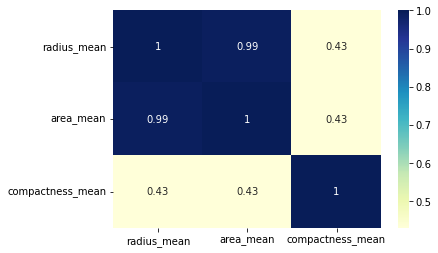

In [20]:
sns.heatmap(three_columns_together.corr(), annot=True, cmap='YlGnBu')

- Bu sonuçlara göre tümör yarıçapı ve tümörün arasında pozitif yönde güçlü bir korelasyon vardır. Zaten bir şeyin yarıçapı artınca alanının da artmasını bekleriz.
- Ama tümör yarıçapı ve tümör yoğunluğu veya tümör alanı ve yoğunluğu arasında pozitif yönde orta-altı bir korelasyon vardır. Tümör yoğunluğu ikinci soruda belirtildiği üzere yüzey alanı ve hacimle ilgilidir. Yarıçap ve alanın, yoğunlukla pozitif yönde korelasyon olacak kadar ilişkisi vardır ancak güçlü bir korelasyon kuracak kadar ilişkisi yoktur.

In [31]:
covariance_matrix = three_columns_together.cov()/10
covariance_matrix

,radius_mean,area_mean,compactness_mean
radius_mean,0.869812,78.893656,0.005558
area_mean,78.893656,7268.633744,0.506670
compactness_mean,0.005558,0.506670,0.000192


<AxesSubplot:>

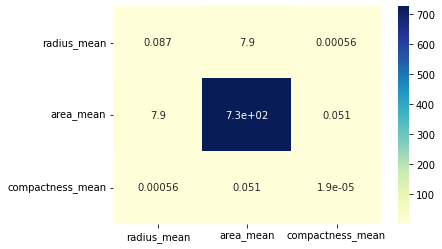

In [30]:
sns.heatmap(covariance_matrix, annot=True, cmap='YlGnBu')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

Korelasyon analizi, iki değişken arasında ilişki olup olmadığını, ilişki varsa ilişkinin yönünü ve kuvvetini belirlemek için yapılan istatiksel bir analizdir. Parametrik ve Non-parametrik olarak 2'ye ayrılır.

- Pearson Correlation Coefficient, normal dağılım gösteren nicel değişkenler arasındaki ilişkiyi hesaplamak için kullanılır.
- Spearmen Rank Correlation, değişkenler normal dağılmadığı durumlarda, iki değişken (sıralı, kesikli, sürekli) arasındaki ilişkiyi hesaplamak için kullanılır.

In [23]:
Image(url= "images/correlations.png", width=500, height=200)

Pearson Correlation Coefficient, iki rastgele değişkenin birbiri arasındaki lineer ilişkiyi ölçer. Sonuçlar +1 ve -1 arasında değer alır ve anlamları şöyledir:
- +1 - Complete positive correlation
- +0.8 - Strong positive correlation
- +0.6 - Moderate positive correlation
- 0 - no correlation whatsoever
- -0.6 - Moderate negative correlation
- -0.8 - Strong negative correlation
- -1 - Complete negative correlation

In [24]:
#pearson hesaplaması
from scipy.stats import pearsonr
corr1,_ = pearsonr(data["radius_mean"],data["area_mean"])
corr2,_ = pearsonr(data["radius_mean"],data["compactness_mean"])
corr3,_ = pearsonr(data["area_mean"],data["compactness_mean"])

print(f"Radius_mean ve area_mean arasındaki korelasyon: {corr1}")
print(f"Radius_mean ve compactness_mean arasındaki korelasyon: {corr2}")
print(f"Area_mean ve compactness_mean arasındaki korelasyon: {corr3}")

Radius_mean ve area_mean arasındaki korelasyon: 0.9922083377314348
Radius_mean ve compactness_mean arasındaki korelasyon: 0.43019437960535334
Area_mean ve compactness_mean arasındaki korelasyon: 0.4290302483015843


İlk yapılan korelasyon işlemine benzer bir sonuç çıkmıştır. Pearson Korelasyonu'na göre yarıçap ve alan arasındaki korelasyon "Strong positive correlation", yarıçap-alan ve alan-yoğunluk arasındaki korelasyon "Moderate positive correlation" altı bir korelasyondur.

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [33]:
#spearman hesaplaması
from scipy.stats import spearmanr
spearman1_rho,_ = spearmanr(data["radius_mean"],data["area_mean"])
spearman2_rho,_ = spearmanr(data["radius_mean"],data["compactness_mean"])
spearman3_rho,_ = spearmanr(data["area_mean"],data["compactness_mean"])

print(f"Radius_mean ve area_mean arasındaki korelasyon: {spearman1_rho}")
print(f"Radius_mean ve compactness_mean arasındaki korelasyon: {spearman2_rho}")
print(f"Area_mean ve compactness_mean arasındaki korelasyon: {spearman3_rho}")

Radius_mean ve area_mean arasındaki korelasyon: 0.9995549643732499
Radius_mean ve compactness_mean arasındaki korelasyon: 0.44400701999204684
Area_mean ve compactness_mean arasındaki korelasyon: 0.43508182254130934


### ----------------------------------------------------------------------------------------------------------------------------------------------------------

- Effect size, bir popülasyondaki iki değişken arasındakiilişkinin kuvvetini ölçen bir istatistiki terimdir. Örnek olarak iki değişken arasındaki korelasyon, regresyon katsayısı, ortalama farkı, belirli bir olayın taşıdığı riskin ölçümlenmesi verilebilir.
- Bilinen 50-100 arası birbirinden farklı effect size ölçümü vardır. 
- Ben bu soru için "Cohen's d" effect size kullanılacaktır.
- Cohen's d, effect size'ın belki de en yaygın yöntemi olan "Difference Family" içerisinde yer alır. Sample'ların ortalama değerleri arasındaki farkı hesaplar. Daha sonra standartize etmek için çıkan fark standart sapmaya bölünür.
- Çözüm için "pingouin" modülü kullanılacaktır.

In [34]:
import pingouin as pg

effect_size1 = pg.compute_effsize(data["radius_mean"], data["area_mean"], eftype='cohen')
effect_size2 = pg.compute_effsize(data["radius_mean"], data["compactness_mean"], eftype='cohen')
effect_size3 = pg.compute_effsize(data["area_mean"], data["compactness_mean"], eftype='cohen')

print(f"radius_mean ve area_mean arasındaki Cohen's d: {effect_size1} ")
print(f"radius_mean ve compactness_mean arasındaki Cohen's d: {effect_size2} ")
print(f"area_mean ve compactness_mean arasındaki Cohen's d: {effect_size3} ")

radius_mean ve area_mean arasındaki Cohen's d: -3.0868443790898326 
radius_mean ve compactness_mean arasındaki Cohen's d: 6.49773181096793 
area_mean ve compactness_mean arasındaki Cohen's d: 3.1581169958573723 


Genel olarak, Cohen's d' nin daha düşük bir değeri, daha büyük bir örneklem büyüklüğünün gerekliliğini gösterir ve bunun tersi de geçerlidir.
Etki büyüklüğünün en yaygın yorumu şu şekildedir:
- Small effect size: d=0.2
- Medium effect size: d=0.5
- Large effect size: d=0.8

# 4. Soru

1) Renkli topları kutudan çekme soruları Bayes Teoremi'nin en klasik sorularındandır. Örneğin; elimizde 2 kutu var. Birinci kutuda 2 yeşil, 7 kırmızı top; ikinci kutuda4 yeşil, 3 kırmızı top olsun. Bir kişi rastgele bu iki kutunun birinden bir kırmızı top çekiyorsa topun 1. kutudan olma olasılığı hesaplanabilir.

2) 100.000 kişide bir görülen nadir bir hastalık için yapılan bir testin rastgele kişiler seçildiğinde,hasta olan kişiler için doğruluğu %99 ve hasta olmayanlar için doğruluğu %99.5 ise bu bilgiler ışığında bir kişinin hasta veya pozitif testli olma olasılığı hesaplanabilir.

3) Spam olduğu kabul edilen 2000 mesajın 250'sinde ve spam olarak görünmeyen 1000 mesajın 5'inde 'Rolex' kelimesini bulduğumuzu kabul edelim. 'Rolex' kelimesini içeren bir mesajın spam olma olasılığı ***Bayes Spam Filtreleri*** kullanılarak hesaplanabilir.

4) 80 yaşının üzerindeki yaşlıların yüksekten düşerek ölme olasılığı Bayes Teoremi kullanılarak hesaplanabilir.

5) Association Rule Mining algoritmaları bir örnek olabilir. Bu algoritmaya örnek olarak genellikle "market sepeti uygulaması" verilir. Buna göre bir kişinin yaptıkları alışverişlerdeki ürünler arasında birliktelikler bularak satın alma alışkanlıklarını çözümler.

# 5. Soru

Bir olasılık dağılımı rastgele bir olayın ortaya çıkabilmesi için gereken değerleri ve olasılıkları tanımlar. Ayrık ve sürekli olasılık dağılımları olarak 2'ye ayrılır.

### Ayrık Olasılık Dağılımları
#### Poisson Dağılımı 
- Belirli bir süre içerisinde, belirli bir alanda, bir olayın meydana gelme sayısının olasılığını göstermek için kullanılabilir. 
- Genellikle belirli bir zaman aralığında meydana gelen **bağımsız** olayları anlamak için kullanılır.
- Örneğin; bir saat aralığında belli bir internete gelen bağlantı sayısı, yarım saat içinde bir nakliyat deposuna yükleme-boşaltma için gelen kamyon sayısı vb.

#### Logaritmik Dağılım
- Kesikli bir olasılık dağılımıdır.
- Temelini Taylor(Maclaurin) serisinden alır. Bu seride, bir fonksiyonun, o fonksiyonun terimlerinin tek bir noktadaki türev değerlerinden hesaplanan sonsuz toplamı şeklinde yazılması şeklindeki gösterimidir. Poisson dağılımı da bu seri üzerinden türetilmiştir.
- Genellikle Log-Normal Dağılımla karıştırılır fakat aynı şey değillerdir. Log-normal dağılım sürekli bir dağılımdır ve  normal dağılım gösteren herhangi bir rassal değişken için tek-kuyruklu bir olasılık dağılımdır.

### Sürekli Olasılık Dağılımları
#### Normal Dağılım
- Normal dağılım, tabiatta gerçekleşen ya da gözlenen pek çok olayın olasılık dağılımının normal dağılıma uygun olması sebebiyle “normal” dağılım olarak adlandırılmaktadır.
-  Pek çok kesikli veya sürekli dağılım belli koşullar oluştuğunda normale dönüşür, bu nedenle de normal dağılım sıklıkla kullanılmaktadır. Çoklukla kullanılmasının sebebi merkezsel limit teoremidir. Bu teoreme göre birçok sayıda küçük bağımsız değişkenin toplamı olarak modeli kurulabilinen her değişkenin yaklaşık olarak normal dağılım göstermesidir.
- Çan eğrisi de denmektedir.

#### Gamma Dağılımı
- Her zaman **pozitif** olan ve çarpık dağılımlara sahip sürekli değişkenleri modellemek için farklı bilim alanlarında yaygın olarak kullanılan bir olasılık dağılımıdır. 
- Gelecekteki olaylar meydana gelene kadar bekleme süresini tahmin etmek için kullanılır.
- İki parametreli bir dağılımdır. Bu parametrelerden biri ölçek parametresi θ; diğeri ise şekil parametresi k olarak anılır. 

#### Weibull Dağılımı
- Yaşama, hayatta kalım ve yetmezlikle yıkım süreçlerini inceleyen verilerin analizi alanında Weibull dağılımı çok elastik olup kolayca değiştirilebildiği için çok kullanılmaktadır.
- Değişik parametre değerleri kullanılarak normal dağılım, üstel dağılım gibi çok popüler diğer istatistiksel dağılımların davranışların Weibull dağılımı kullanarak aynen taklid etme imkânı bulunmaktadır.